# 가위바위보 이미지를 딥러닝 학습시키기


## *목차


#### 1.각 패키지 불러오기
#### 2.모든 경로 설정하기
#### 3.학습 및 테스트 데이터셋 준비, 전처리
#### 4.딥러닝 네트워크 설계하기
#### 5.훈련
#### 6.추론
#### 논의사항

## 1. 각 패키지 설치 및 불러오기

In [84]:
# 패키지 설치 및 불러오기

!pip install pillow  
from PIL import Image
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

## 2. 모든 경로 설정하기

##### ubuntu home path : ubuntu home 의 경로
##### train images path : 학습 이미지들의 경로
##### test images path : 테스트 이미지들의 경로

In [85]:
ubuntu_home_path = os.getenv("HOME")   # ./home/aiffel
#train_images_path = ubuntu_home_path + "/aiffel/exp1_rock_scissor_paper/images/rock_scissor_paper_train"
#test_images_path = ubuntu_home_path + "/aiffel/exp1_rock_scissor_paper/images/rock_scissor_paper_test"

train_images_path = ubuntu_home_path + "/aiffel/exp1_rock_scissor_paper/images/train_dataset_total_chatenim/data_3200"
test_images_path = ubuntu_home_path + "/aiffel/exp1_rock_scissor_paper/images/testset/data2"

number_of_data=15000   # 가위바위보 이미지 개수 총합에 주의하세요.

## 3.학습 및 테스트 데이터셋 준비, 전처리
#### 1)이미지 촬영 및 다운로드 (https://teachablemachine.withgoogle.com/), 경로설정
#### 2)학습이미지 resize(224x224x3 >> 28x28x3)
#### 3)학습이미지  label(0/1/2), 메모리 올리기
#### 4)이미지 normalize

In [86]:
# 2) 학습이미지 resize

# 1 장의 이미지를 resize 하는 함수
def resize_image(img):
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")


target_size=(28,28)  # 28*28로 resize
directories = ['rock', 'scissor', 'paper']  # 3개 폴더 모두 적용

# 가위 바위 보 3 폴더에 대해서 resize 진행
for dir in directories:   # rock, scissor, paper 3개 폴더에 대해서
    images = glob.glob(train_images_path + "/" + dir + "/*.jpg")  # 폴더 안의 모든 사진을
    for img in images:
        resize_image(img)   # resize
print("rock scissor paper resize finished")

rock scissor paper resize finished


In [87]:
# 3) 학습 이미지 label, x_train, y_train 설정

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

In [88]:
# 4) 이미지 올리기, normalize

# x_train, y_train 설정
(x_train, y_train)=load_data(train_images_path)
# x_train normalize
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 9300 입니다.
x_train_norm shape: (15000, 28, 28, 3)
y_train shape: (15000,)


라벨:  0
[[  3   0   0]
 [ 77  76  74]
 [170 175 171]
 [148 159 153]
 [151 166 159]
 [139 156 148]
 [149 164 157]
 [129 140 132]
 [136 139 130]
 [142 140 128]
 [134 126 113]
 [110 101  84]
 [ 99  91  70]
 [118 112  86]
 [148 145 114]
 [168 165 134]
 [128 116 100]
 [110 101  86]
 [107  99  86]
 [142 138 127]
 [181 180 175]
 [185 187 184]
 [176 180 179]
 [182 187 190]
 [179 184 187]
 [116 120 121]
 [113 115 114]
 [ 89  88  86]]


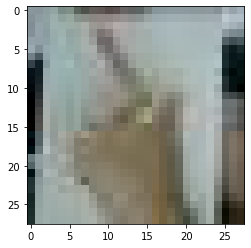

In [89]:
# image test

n = 210

plt.imshow(x_train[n])
print('라벨: ', y_train[n])
print(x_train[n][14])

라벨:  0
[[0.44313725 0.43921569 0.43137255]
 [0.45098039 0.44705882 0.43137255]
 [0.46666667 0.45098039 0.43921569]
 [0.47058824 0.45490196 0.44313725]
 [0.4745098  0.45490196 0.44313725]
 [0.49019608 0.45882353 0.45098039]
 [0.50588235 0.46666667 0.45882353]
 [0.52156863 0.47843137 0.47058824]
 [0.54117647 0.48627451 0.48235294]
 [0.34509804 0.2745098  0.2745098 ]
 [0.27843137 0.2        0.19607843]
 [0.28627451 0.20392157 0.2       ]
 [0.32156863 0.23921569 0.23529412]
 [0.38823529 0.29411765 0.29411765]
 [0.50588235 0.41176471 0.40392157]
 [0.65882353 0.55686275 0.55294118]
 [0.55686275 0.54901961 0.55294118]
 [0.55686275 0.54901961 0.55294118]
 [0.55686275 0.54901961 0.55294118]
 [0.56078431 0.55294118 0.56470588]
 [0.56078431 0.56078431 0.56862745]
 [0.56078431 0.56078431 0.56862745]
 [0.56470588 0.56470588 0.57254902]
 [0.56078431 0.56470588 0.58039216]
 [0.57254902 0.57647059 0.59215686]
 [0.56862745 0.57254902 0.58823529]
 [0.56078431 0.56470588 0.58431373]
 [0.54509804 0.556862

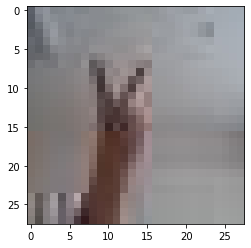

In [90]:
# norm image test

n = 100

plt.imshow(x_train_norm[n])
print('라벨: ', y_train[n])
print(x_train_norm[n][14])

## 4. 딥러닝 네트워크 설계
#### MNIST 와 동일하나, hyperparameter 수정

In [91]:
n_channel_1 = 16
n_channel_2 = 32    # 
n_dense = 32   # 
n_train_epoch = 10
input_image_shape = (28,28,3)  # rgb 3 channel
classes_number = 3  # rock scissor paper

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=input_image_shape))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_2, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(classes_number, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

## 5.Train

In [92]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.6344 - accuracy: 0.6853
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3471 - accuracy: 0.8625
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1982 - accuracy: 0.9295
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1212 - accuracy: 0.9603
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0834 - accuracy: 0.9738
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0551 - accuracy: 0.9838
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0473 - accuracy: 0.9860
Epoch 8/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0304 - accuracy: 0.9920
Epoch 9/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0294 - accuracy: 0.9913
Epoch 10/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0296 - accuracy: 0.9921

## 6.Test

In [93]:
# test image dataset 세팅

print("test 이미지 디렉토리 경로: ", test_images_path)
(x_test, y_test)=load_data(test_images_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("x_test_norm shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

test 이미지 디렉토리 경로:  /home/aiffel/aiffel/exp1_rock_scissor_paper/images/testset/data2
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (15000, 28, 28, 3)
x_test_norm shape: (15000, 28, 28, 3)
y_test shape: (15000,)


In [94]:
# Test 진행

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

469/469 - 0s - loss: 0.1240 - accuracy: 0.9860
test_loss: 0.12398358434438705 
test_accuracy: 0.9860000014305115


## 논의

#### 1.과연 가위바위보를 분류하는데 딥러닝을 적용하는게 맞는 것일까?
손을 인식하기 위한 딥러닝 분류를 적용하는 것은 맞다고 맞다.
그런데 어찌보면 가위바위보는 손가락 숫자를 counting 하는 것이다
어떤 사람은 가위를 엄지/검지로 하고 어떤 사람은 검지/중지로 한다.
손을 인식하고, 해당 box 안에 손가락을 counting 하는 것은 다른 기존의 영상처리법으로 하는게 낫지 않을까??


#### 2.손 사진을 28 * 28 * 3 으로 resize/reshape 하는 것이 적절할까?
resize 사진을 보면 사람도 구분하기 애매한 것들이 많다.
오리지날 image가 224 * 224 * 3 이니까 정도면 직접 학습하면 어떨까? 학습시간은 오래걸리겠지만 성능은 낫지 않을까


#### 3.이미지 레이블 박스 처리를 해줬어야하지 않나?
손 사진을 학습시킬때, 사실 28*28 모든 픽셀을 학습에 사용하였지만, 실제 손 사진은 
즉, 이미지 레이블 박스를 치지 않았다.
이 과정에서 훈련 데이터 셋이 전처리가 깔끔하게 되었다고 보기 힘들다.

#### 4.normalize 할때 255 로 나누기만 하면 될까?
이미지 내 최대 밝기/최소밝기가 있다면, max>>1, min>>0 사이의 값으로 normalize하는게 맞지 않을까